In [1]:
pip install numpy pandas matplotlib seaborn opencv-python scikit-learn tensorflow keras


Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install opencv-python tensorflow keras


In [5]:
import matplotlib.pyplot as plt
import cv2
import os

image_path = "Downloads/data.csv"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("Sample Image")
plt.axis("off")
plt.show()


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [7]:
import pandas as pd

data = pd.read_csv("Downloads/data.csv")
data.head()  # Show first few rows


,Unnamed: 0,image,classes
0,0,image/0.jpeg,unknown
1,1,image/1.jpeg,head_lamp
2,2,image/2.jpeg,door_scratch
3,3,image/3.jpeg,head_lamp
4,4,image/4.jpeg,unknown


In [9]:
import pandas as pd

# Load the data
df = pd.read_csv("Downloads/data.csv")

# Preview the data
df.head()


,Unnamed: 0,image,classes
0,0,image/0.jpeg,unknown
1,1,image/1.jpeg,head_lamp
2,2,image/2.jpeg,door_scratch
3,3,image/3.jpeg,head_lamp
4,4,image/4.jpeg,unknown


In [11]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594 entries, 0 to 1593
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1594 non-null   int64 
 1   image       1594 non-null   object
 2   classes     1594 non-null   object
dtypes: int64(1), object(2)
memory usage: 37.5+ KB


Unnamed: 0    0
image         0
classes       0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)  # Convert classes to 0, 1, 2...


NameError: name 'y' is not defined

In [15]:
X = df.drop('damage_type', axis=1)
y = df['damage_type']


KeyError: "['damage_type'] not found in axis"

In [17]:
print(df.columns)


Index(['Unnamed: 0', 'image', 'classes'], dtype='object')


In [19]:
df = df.drop(columns=['Unnamed: 0'])
df['classes'].value_counts()


classes
unknown           549
door_dent         192
bumper_scratch    164
door_scratch      154
glass_shatter     137
tail_lamp         136
head_lamp         133
bumper_dent       129
Name: count, dtype: int64

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['classes'])


In [25]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)


In [27]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(input_shape=(224,224,3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 18s 2us/step


In [29]:
model.compile(
    loss='categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' if labels are integers
    optimizer='adam',
    metrics=['accuracy']
)


NameError: name 'model' is not defined

In [31]:
from tensorflow.keras import layers, models

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model

# Add classification head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')  # replace `num_classes` with the number of damage types
])


NameError: name 'num_classes' is not defined

In [33]:
num_classes = df['classes'].nunique()


In [35]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Count number of unique classes
num_classes = df['classes'].nunique()

# Load base model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])


In [37]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [39]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr]
)


NameError: name 'train_generator' is not defined

In [41]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)


In [43]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy over epochs')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over epochs')
plt.show()


NameError: name 'history' is not defined

In [45]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


NameError: name 'train_generator' is not defined

In [53]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Load the CSV
df = pd.read_csv(r'C:/Users/USER/Downloads/archive (3)/data.csv')

# Step 2: Set full image path in dataframe
df['image'] = df['image'].apply(lambda x: f"C:/Users/USER/Downloads/archive (3)/image/{x}")

# Step 3: ImageDataGenerator
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    x_col='image',
    y_col='classes',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_dataframe(
    dataframe=df,
    x_col='image',
    y_col='classes',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 1594 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 1594 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


In [55]:
import os

# base directory
image_dir = r'C:/Users/USER/Downloads/archive (3)/image'

# prepend image path
df['image'] = df['image'].apply(lambda x: os.path.join(image_dir, x.strip()))


In [57]:
train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    x_col='image',
    y_col='classes',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)


Found 0 validated image filenames belonging to 0 classes.


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 1594 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


In [59]:
import os

missing = df[~df['image'].apply(os.path.exists)]
print(f"Missing files: {len(missing)}")
print(missing['image'].head())


Missing files: 1594
0    C:/Users/USER/Downloads/archive (3)/image/imag...
1    C:/Users/USER/Downloads/archive (3)/image/imag...
2    C:/Users/USER/Downloads/archive (3)/image/imag...
3    C:/Users/USER/Downloads/archive (3)/image/imag...
4    C:/Users/USER/Downloads/archive (3)/image/imag...
Name: image, dtype: object


In [61]:
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    x_col='image',
    y_col='classes',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)


Found 0 validated image filenames belonging to 0 classes.


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 1594 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


In [63]:
df['image'].head()

0    C:/Users/USER/Downloads/archive (3)/image/imag...
1    C:/Users/USER/Downloads/archive (3)/image/imag...
2    C:/Users/USER/Downloads/archive (3)/image/imag...
3    C:/Users/USER/Downloads/archive (3)/image/imag...
4    C:/Users/USER/Downloads/archive (3)/image/imag...
Name: image, dtype: object

In [65]:
import os

# Folder where the images are
image_folder = r'C:/Users/USER/Downloads/archive (3)/image'

# Only use the filename (no 'image/' inside)
df['image'] = df['image'].apply(lambda x: os.path.join(image_folder, os.path.basename(str(x).strip())))


In [67]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    x_col='image',
    y_col='classes',  # make sure this column exists in your CSV
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)


Found 1276 validated image filenames belonging to 8 classes.


In [69]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [71]:
# Get number of classes
num_classes = train_generator.num_classes

# Load base model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # freeze base

# Add custom layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])


AttributeError: 'DataFrameIterator' object has no attribute 'num_classes'

In [73]:
num_classes = len(train_generator.class_indices)


In [75]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])


In [77]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [79]:
val_generator = datagen.flow_from_dataframe(
    dataframe=df,
    x_col='image',
    y_col='classes',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 318 validated image filenames belonging to 8 classes.


In [81]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 47s 981ms/step - accuracy: 0.4377 - loss: 1.7382 - val_accuracy: 0.6918 - val_loss: 0.9328
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 661ms/step - accuracy: 0.7176 - loss: 0.8039 - val_accuracy: 0.7893 - val_loss: 0.6747
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 29s 726ms/step - accuracy: 0.8153 - loss: 0.5520 - val_accuracy: 0.8208 - val_loss: 0.6089
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 679ms/step - accuracy: 0.8511 - loss: 0.4879 - val_accuracy: 0.7893 - val_loss: 0.5861
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 672ms/step - accuracy: 0.8814 - loss: 0.3311 - val_accuracy: 0.8208 - val_loss: 0.5634
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 695ms/step - accuracy: 0.9025 - loss: 0.3039 - val_accuracy: 0.8239 - val_loss: 0.5324
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 680ms/step - accuracy: 0.9399 - loss: 0.2248 - val_accuracy: 0.8239 - val_loss: 0.5333
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 682ms/step - accuracy: 0.9661 - loss: 0.1622 - val_accu

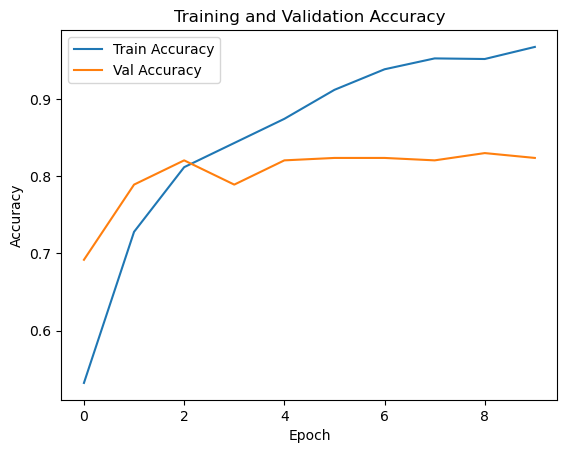

In [83]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [85]:
model.save('car_damage_model.h5')


In [1]:
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=None,
    x_col='image',
    y_col='classes',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)


NameError: name 'datagen' is not defined

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


In [19]:
import pandas as pd

# Load CSV from current working directory
df = pd.read_csv("data.csv")


In [23]:
train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=None,
    x_col='image',
    y_col='classes',
    subset='training',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

val_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=None,
    x_col='image',
    y_col='classes',
    subset='validation',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)


Found 1276 validated image filenames belonging to 8 classes.
Found 318 validated image filenames belonging to 8 classes.


In [25]:
print(train_generator.class_indices)


{'bumper_dent': 0, 'bumper_scratch': 1, 'door_dent': 2, 'door_scratch': 3, 'glass_shatter': 4, 'head_lamp': 5, 'tail_lamp': 6, 'unknown': 7}


In [27]:
print(train_generator.class_indices)


{'bumper_dent': 0, 'bumper_scratch': 1, 'door_dent': 2, 'door_scratch': 3, 'glass_shatter': 4, 'head_lamp': 5, 'tail_lamp': 6, 'unknown': 7}


In [29]:
# Use this to get the correct class order
class_indices = train_generator.class_indices

# Sort by the index to get correct order
class_names = [cls for cls, idx in sorted(class_indices.items(), key=lambda x: x[1])]
